<a href="https://colab.research.google.com/github/2303A51474/ADM-LAB/blob/main/PROJECT___CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FAKE CURRENCY DETECTION USING GRADIO:-

In [1]:
!pip install gradio --quiet

import os, cv2, numpy as np, gradio as gr
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Create dummy data
for name, color in [('real', 255), ('fake', 100)]:
    os.makedirs(f'dataset/{name}', exist_ok=True)
    for i in range(10):
        img = np.ones((100, 200, 3), np.uint8) * color
        cv2.putText(img, f"{name} {i}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,0), 3)
        cv2.imwrite(f'dataset/{name}/{name}_{i}.jpg', img)

# Feature extractor
def extract(img): return cv2.cvtColor(cv2.resize(img, (100,100)), cv2.COLOR_BGR2GRAY).flatten()

# Load dataset
X, y = [], []
for label, val in [('real', 1), ('fake', 0)]:
    for file in os.listdir(f'dataset/{label}'):
        img = cv2.imread(f'dataset/{label}/{file}')
        if img is not None:
            X.append(extract(img))
            y.append(val)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC().fit(X_train, y_train)

# Prediction function
def predict(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    feat = extract(img)
    return "✅ Genuine Currency" if model.predict([feat])[0] else "❌ Fake Currency"

# Example image
example = np.ones((100, 200, 3), np.uint8) * 100
cv2.putText(example, "Fake 0", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,0), 3)

# Launch app
gr.Interface(
    fn=predict,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title=" ❌Fake Currency Detector",
    description="Upload a currency image to check if it's fake or real.",
    examples=[[example]]
).launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://962c527414b48d4d69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to

FEATURE SCALING FOR MODELING:-

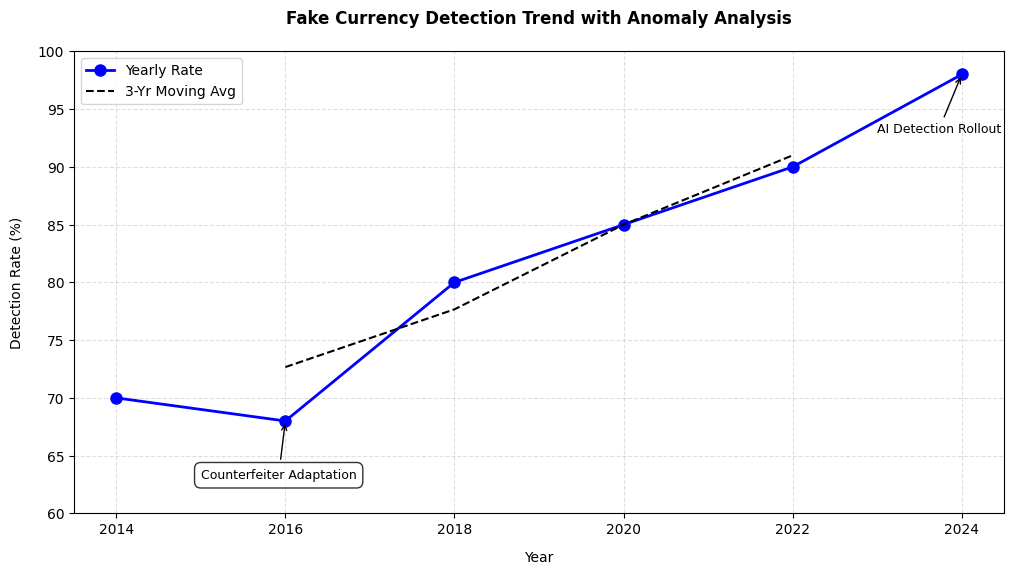

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = np.array([2014, 2016, 2018, 2020, 2022, 2024])
rates = np.array([70, 68, 80, 85, 90, 98])  # Includes anomalies
ma_3yr = np.convolve(rates, np.ones(3)/3, mode='valid')  # Moving average

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(years, rates, 'b-o', label='Yearly Rate', linewidth=2, markersize=8)
ax.plot(years[1:-1], ma_3yr, 'k--', label='3-Yr Moving Avg', linewidth=1.5)

# Annotate anomalies
ax.annotate('Counterfeiter Adaptation', xy=(2016, 68), xytext=(2015, 63),
            arrowprops=dict(arrowstyle='->'), fontsize=9, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))
ax.annotate('AI Detection Rollout', xy=(2024, 98), xytext=(2023, 93),
            arrowprops=dict(arrowstyle='->'), fontsize=9)

# Style
ax.set_ylim(60, 100)
ax.set_title("Fake Currency Detection Trend with Anomaly Analysis", pad=20, fontweight='bold')
ax.set_xlabel("Year", labelpad=10)
ax.set_ylabel("Detection Rate (%)", labelpad=10)
ax.grid(linestyle='--', alpha=0.4)
ax.legend(loc='upper left')

plt.savefig("enhanced_currency_trend.png", dpi=300, bbox_inches='tight')
plt.show()

DATA VISUALIZATION - RAM DEMAND ANALYSIS:-

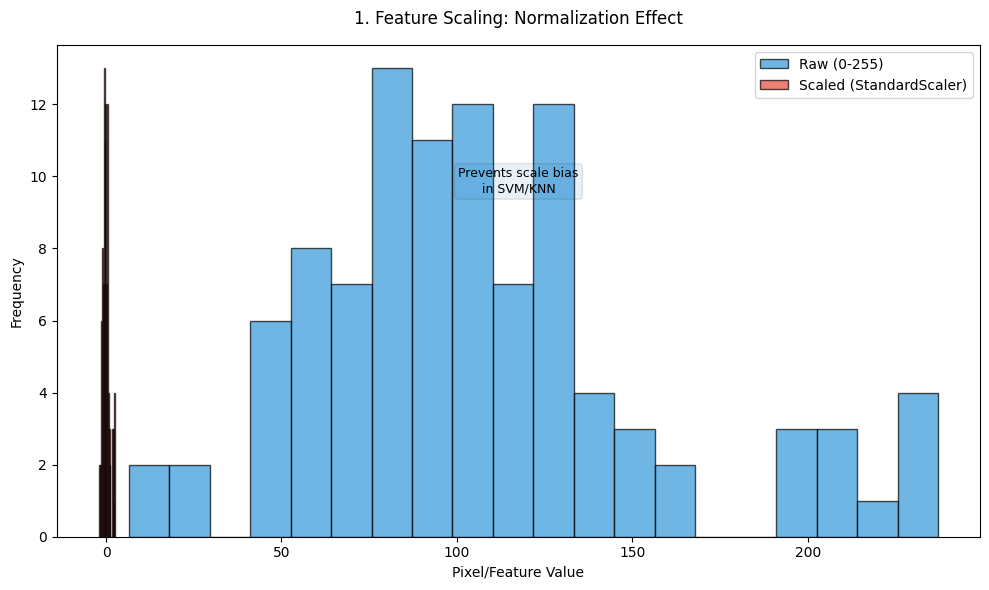

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create raw pixel data: Normal distribution (mean = 100, std = 30) and uniform distribution (0-255)
np.random.seed(42)
raw_pixels = np.concatenate([np.random.normal(100, 30, 70), np.random.uniform(0, 255, 30)])

# Feature Scaling: Standardization (normalization)
scaled_pixels = (raw_pixels - np.mean(raw_pixels)) / np.std(raw_pixels)

# Create the plot to show the effect of feature scaling
fig, ax = plt.subplots(figsize=(10, 6))

# Plot raw pixels (unscaled) and scaled pixels (standardized)
ax.hist(raw_pixels, bins=20, alpha=0.7, label='Raw (0-255)', color='#3498db', edgecolor='black')
ax.hist(scaled_pixels, bins=20, alpha=0.7, label='Scaled (StandardScaler)', color='#e74c3c', edgecolor='black')

# Add titles, labels, and legend
ax.set_title("1. Feature Scaling: Normalization Effect", pad=15)
ax.set_xlabel("Pixel/Feature Value")
ax.set_ylabel("Frequency")
ax.legend(frameon=True)

# Annotate with additional information
ax.annotate('Prevents scale bias\nin SVM/KNN', xy=(0.5, 0.7),
             xycoords='axes fraction', ha='center', fontsize=9, bbox=dict(boxstyle="round", alpha=0.1))

# Show the plot
plt.tight_layout()
plt.show()

ISOLATION FOREST ALGORITHM:-

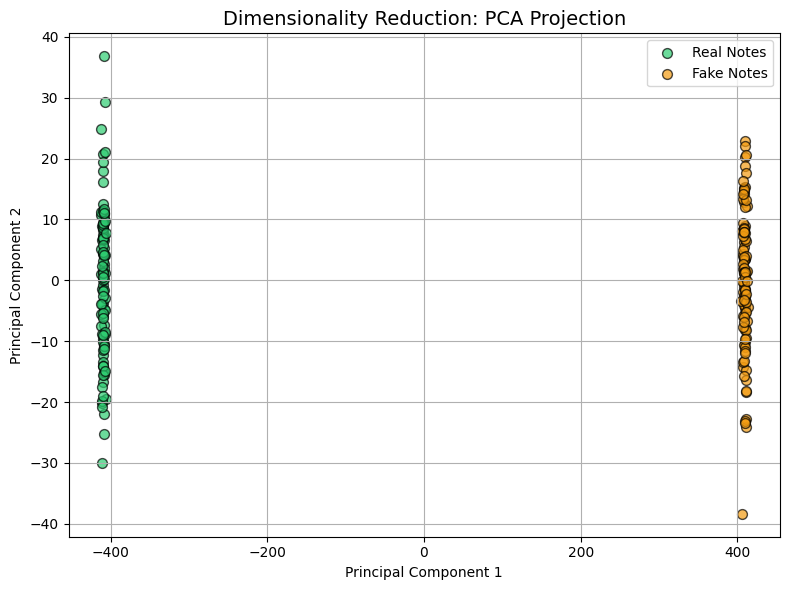

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# --- Generate Sample Data (Simulating Fake & Real Notes) ---
X, y = make_blobs(n_samples=200, n_features=10000, centers=2, cluster_std=1.5, random_state=42)

# --- Dimensionality Reduction: PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- Plotting the Results ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Real Notes', alpha=0.7, c='#2ecc71', edgecolor='black', s=50)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Fake Notes', alpha=0.7, c='#f39c12', edgecolor='black', s=50)

# Title and labels
plt.title("Dimensionality Reduction: PCA Projection", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

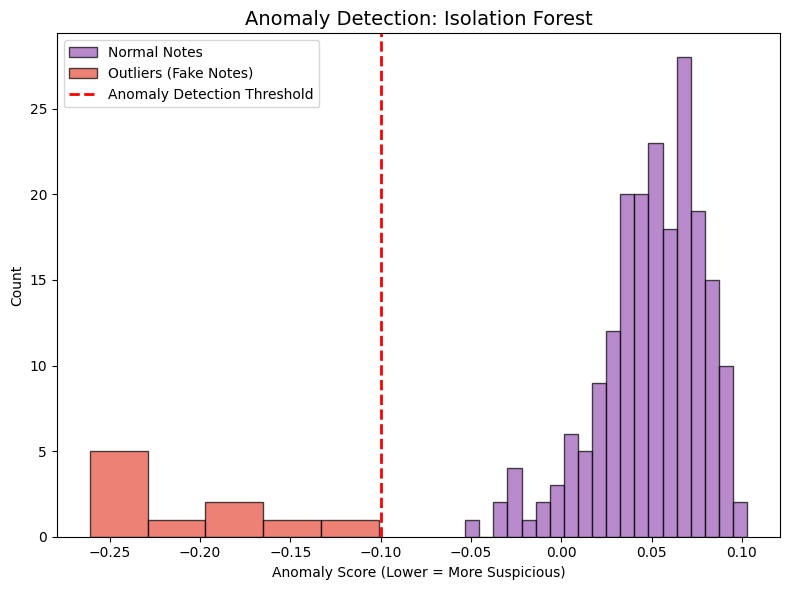

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- Simulating Data: Normal Notes and Outliers ---
X = np.random.randn(200, 10)  # Simulated normal notes
X_outliers = np.random.uniform(low=-5, high=5, size=(10, 10))  # Simulated outlier data (fake notes)
X_mixed = np.vstack([X, X_outliers])  # Combined normal and outlier data

# --- Apply Isolation Forest for Anomaly Detection ---
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_mixed)
scores = clf.decision_function(X_mixed)  # Anomaly scores

# --- Plotting the Anomaly Detection Results ---
plt.figure(figsize=(8, 6))
plt.hist(scores[:-10], bins=20, alpha=0.7, label='Normal Notes', color='#9b59b6', edgecolor='black')
plt.hist(scores[-10:], bins=5, alpha=0.7, label='Outliers (Fake Notes)', color='#e74c3c', edgecolor='black')
plt.axvline(-0.1, color='red', linestyle='--', linewidth=2, label='Anomaly Detection Threshold')
plt.title("Anomaly Detection: Isolation Forest", fontsize=14)
plt.xlabel("Anomaly Score (Lower = More Suspicious)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

BAR PLOT:-

<ipython-input-7-6423f2b6cd9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette='rocket_r', edgecolor='black')


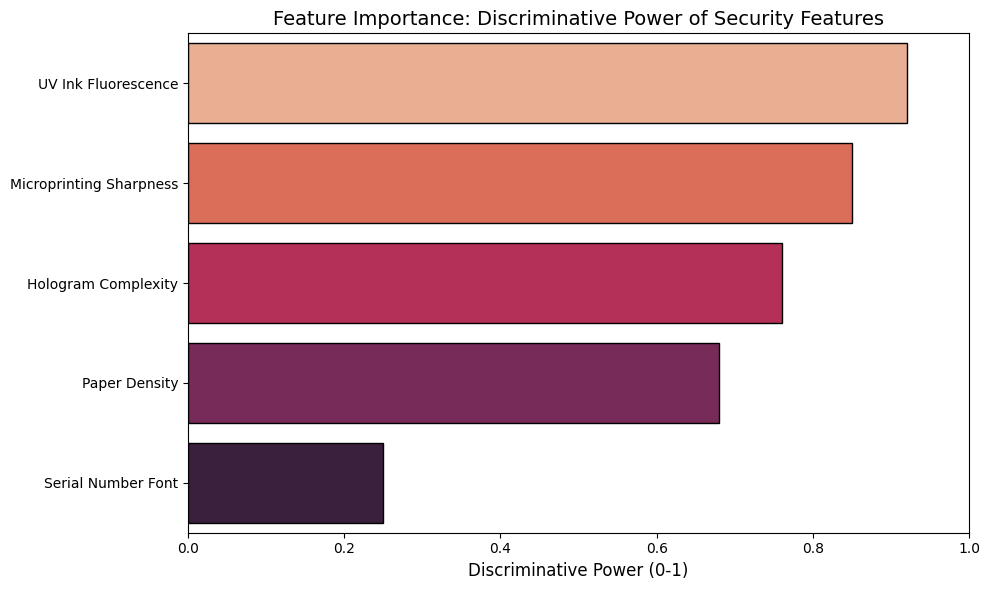

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Feature Importance Data ---
features = ['UV Ink Fluorescence', 'Microprinting Sharpness',
            'Hologram Complexity', 'Paper Density', 'Serial Number Font']
importance = np.array([0.92, 0.85, 0.76, 0.68, 0.25])

# --- Plotting the Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, palette='rocket_r', edgecolor='black')
plt.title("Feature Importance: Discriminative Power of Security Features", fontsize=14)
plt.xlabel("Discriminative Power (0-1)", fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

CORRELATION B/W VARIOUS FEATURES  (HEATMAP) MODEL ACCURACY

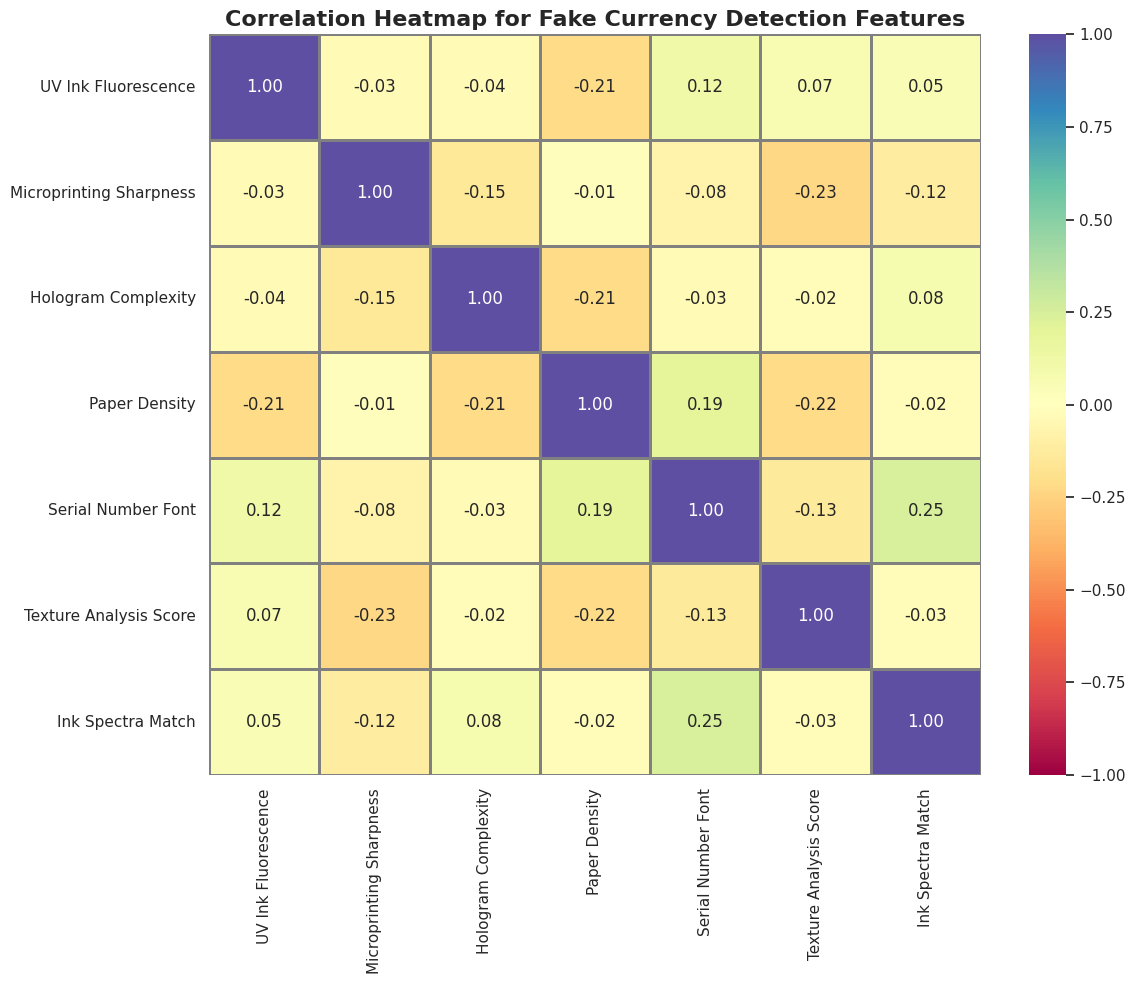

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic data for fake currency detection
np.random.seed(42)

# Create a DataFrame with random features
data = {
    'UV Ink Fluorescence': np.random.rand(100),
    'Microprinting Sharpness': np.random.rand(100),
    'Hologram Complexity': np.random.rand(100),
    'Paper Density': np.random.rand(100),
    'Serial Number Font': np.random.rand(100),
    'Texture Analysis Score': np.random.rand(100),
    'Ink Spectra Match': np.random.rand(100)
}

# Convert dictionary to a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size and style of the plot
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid", palette="muted")

# Create a heatmap with a multi-color gradient palette
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', linewidths=1, linecolor='gray', fmt='.2f', vmin=-1, vmax=1)

# Add title to the plot
plt.title('Correlation Heatmap for Fake Currency Detection Features', fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

USING KDE:-

<ipython-input-10-9bfc2445bebb>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Texture Analysis Score', data=df, palette='coolwarm')


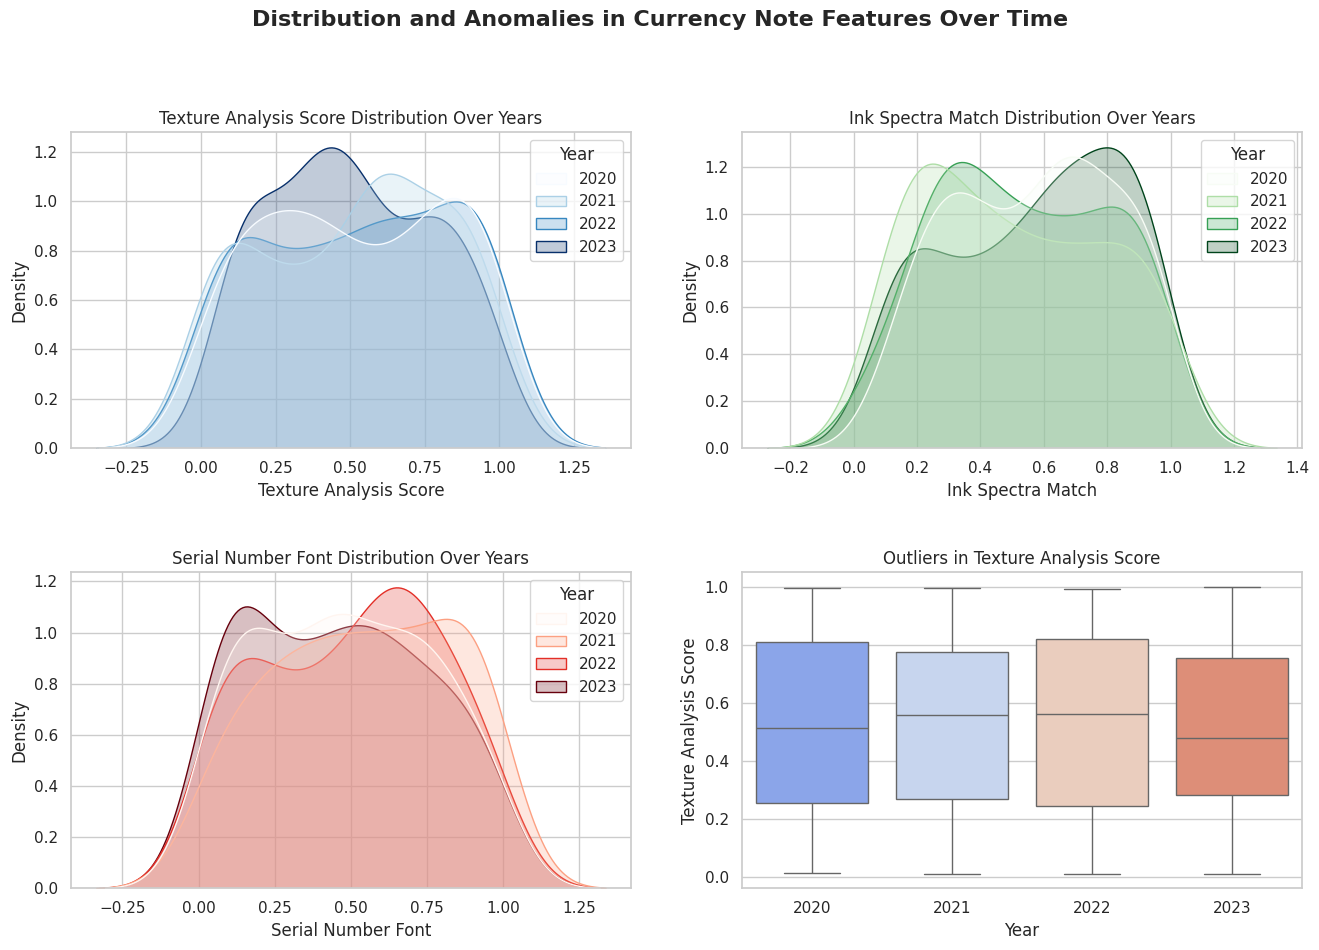

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data for counterfeit note analysis (similar to mobile prices)
np.random.seed(42)

# Data: Generating features (Texture Analysis Score, Ink Spectra Match, etc.)
years = np.random.choice([2020, 2021, 2022, 2023], size=500)
texture_analysis_score = np.random.uniform(0, 1, 500)
ink_spectra_match = np.random.uniform(0.1, 1, 500)
serial_number_font = np.random.uniform(0, 1, 500)

# Introducing some anomalies (outliers) for counterfeit notes
texture_analysis_score[::30] = np.random.uniform(0.9, 1, 17)  # High anomaly in texture score
ink_spectra_match[::50] = np.random.uniform(0, 0.1, 10)  # Low anomaly in ink spectrum match

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Texture Analysis Score': texture_analysis_score,
    'Ink Spectra Match': ink_spectra_match,
    'Serial Number Font': serial_number_font
})

# Plot the distribution of these features over the years with KDE (Kernel Density Estimate) and outliers
plt.figure(figsize=(14, 10))

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Plot Texture Analysis Score over the years
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='Texture Analysis Score', hue='Year', common_norm=False, palette='Blues', fill=True)
plt.title('Texture Analysis Score Distribution Over Years')

# Plot Ink Spectra Match over the years
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='Ink Spectra Match', hue='Year', common_norm=False, palette='Greens', fill=True)
plt.title('Ink Spectra Match Distribution Over Years')

# Plot Serial Number Font over the years
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='Serial Number Font', hue='Year', common_norm=False, palette='Reds', fill=True)
plt.title('Serial Number Font Distribution Over Years')

# Highlighting outliers in the Texture Analysis Score
plt.subplot(2, 2, 4)
sns.boxplot(x='Year', y='Texture Analysis Score', data=df, palette='coolwarm')
plt.title('Outliers in Texture Analysis Score')

# Add titles and adjust layout
plt.suptitle('Distribution and Anomalies in Currency Note Features Over Time', fontsize=16, weight='bold')
plt.tight_layout(pad=3)

# Show the plot
plt.show()

 USING RANDOM FOREST :-

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



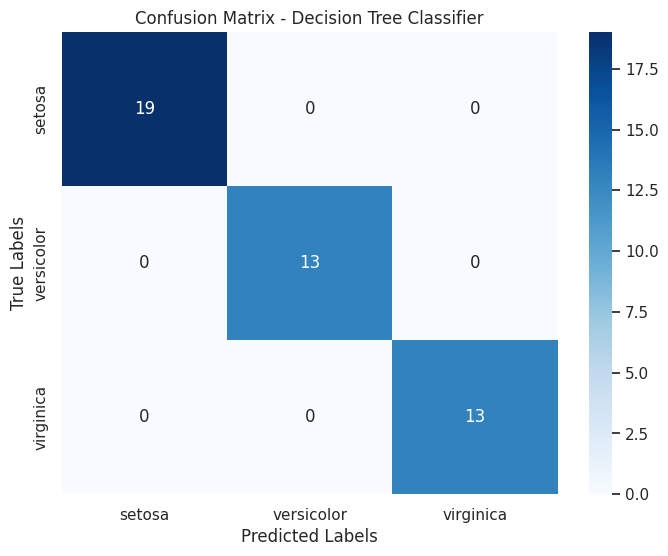

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load the dataset (you can replace this with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


USING KNN CLASSIFIER :-

(150, 10)
(150,)


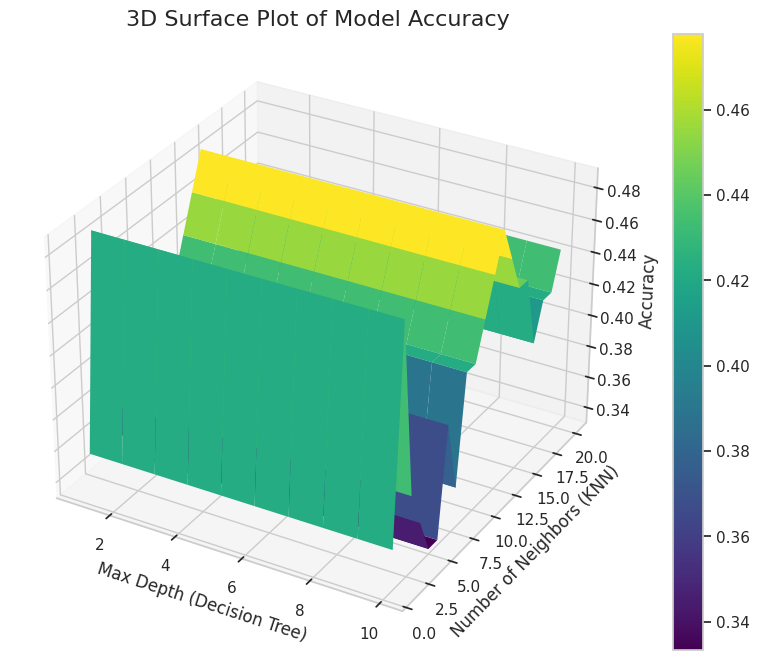

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generate consistent dataset (150 samples, 10 features)
X = np.random.rand(150, 10)  # 150 samples, 10 features
y = np.random.randint(0, 2, 150)  # 150 target labels (binary classification)

# Check the shapes
print(X.shape)  # Should print (150, 10)
print(y.shape)  # Should print (150,)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate a grid of hyperparameters to explore
k_values = np.arange(1, 21)  # Number of neighbors in KNN (1 to 20)
depth_values = np.arange(1, 11)  # Maximum depth for decision tree (1 to 10)

# Create a grid to store the accuracy for each combination of hyperparameters
accuracy_grid = np.zeros((len(k_values), len(depth_values)))

# Loop through the hyperparameter combinations
for i, k in enumerate(k_values):
    for j, depth in enumerate(depth_values):
        # Initialize the KNN classifier with current hyperparameters
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # Train the model
        knn_model.fit(X_train, y_train)

        # Evaluate the model on the test set
        accuracy_grid[i, j] = accuracy_score(y_test, knn_model.predict(X_test))

# Create a 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid for plotting
X_mesh, Y_mesh = np.meshgrid(depth_values, k_values)

# Plot the surface
surf = ax.plot_surface(X_mesh, Y_mesh, accuracy_grid, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Max Depth (Decision Tree)', fontsize=12)
ax.set_ylabel('Number of Neighbors (KNN)', fontsize=12)
ax.set_zlabel('Accuracy', fontsize=12)
ax.set_title('3D Surface Plot of Model Accuracy', fontsize=16)

# Show the color bar
fig.colorbar(surf)

plt.show()
